<a href="https://colab.research.google.com/github/hifza678/Assignment-3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.	Accuracy Metrics Calculation**
•	Task: Train a classification model on a dataset of your choice and calculate the following metrics on the test set:
•	Accuracy
•	Precision
•	Recall
•	F1-Score
•	Question: What are the calculated values for accuracy, precision, recall, and F1-score? What do these metrics tell you about your model's performance?


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.83
Precision: 0.8666666666666667
Recall: 0.8198198198198198
F1-Score: 0.8425925925925926


# **2.	Confusion Matrix Interpretation**
•	Task: Create a confusion matrix for your classification model on the test set.
•	Question: Present the confusion matrix and explain what each value represents. How does the confusion matrix help in understanding the model's performance?


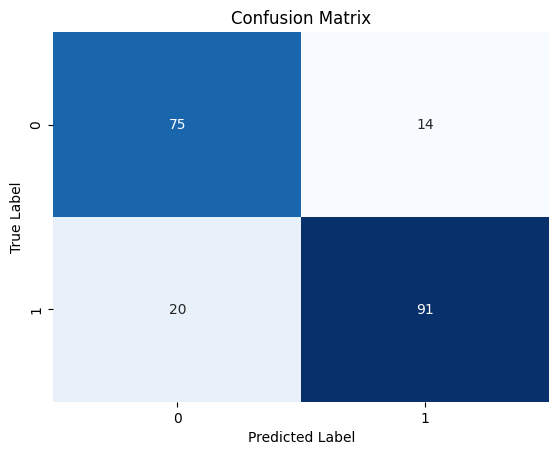

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# 3.	**ROC/AUC Calculation**
•	Task: Plot the ROC curve and calculate the AUC for your classification model on the test set.
•	Question: What does the ROC curve look like? What is the AUC value? How do these metrics help in evaluating your model's performance?
# **bold text**

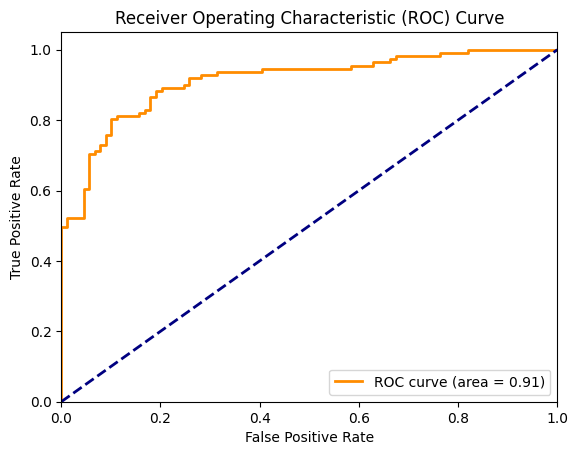

AUC: 0.9126429800587104


In [3]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


# 4.**	Cross-Validation Reporting**
•	Task: Perform k-fold cross-validation (e.g., k=5) for your classification model and report the mean and standard deviation of the accuracy.
•	Question: What are the mean and standard deviation of the cross-validation accuracy? Why is cross-validation important in model evaluation?


In [4]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(model, X, y, cv=5)

# Calculate mean and standard deviation of accuracy
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Mean Accuracy: 0.8560000000000001
Standard Deviation of Accuracy: 0.01593737745050924
